   Gaji  Pengeluaran
0  2500         1750
1  3800         4200
2  3900         3800
3  4350         5500
4  4400         3200


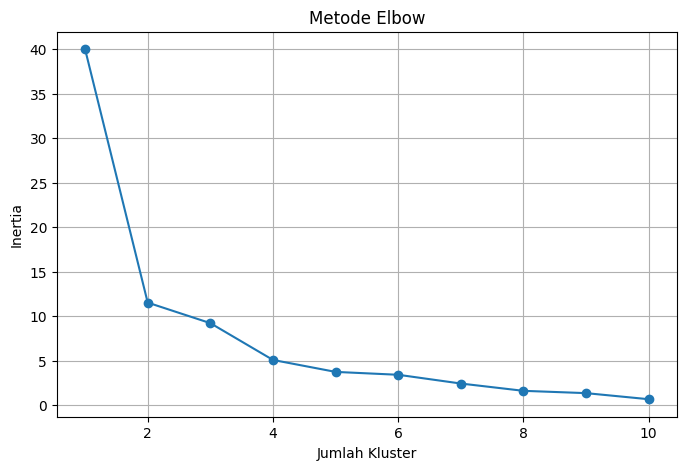

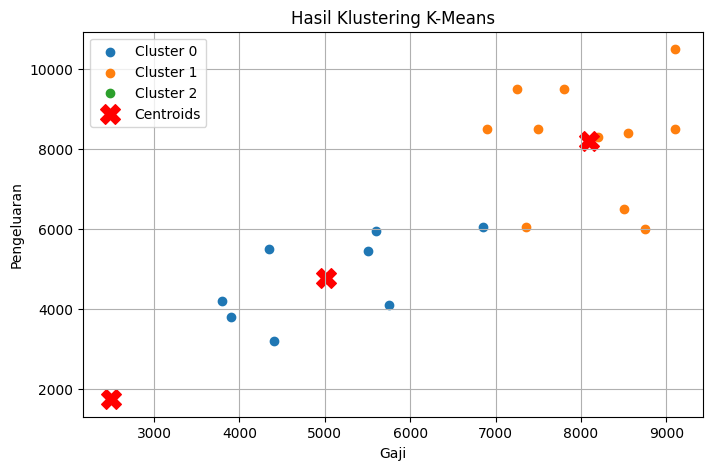

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Membaca data dari file CSV
data = pd.read_csv('/konsumen.csv')

# Menampilkan sekilas data
print(data.head())

# Standarisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Menentukan jumlah kluster optimal menggunakan metode elbow
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Visualisasi metode elbow
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Kluster')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Menentukan jumlah kluster optimal (misalnya 3 berdasarkan elbow)
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Visualisasi hasil klustering
plt.figure(figsize=(8, 5))
for cluster in range(k_optimal):
    clustered_data = data[data['Cluster'] == cluster]
    plt.scatter(clustered_data['Gaji'], clustered_data['Pengeluaran'], label=f'Cluster {cluster}')

# Menampilkan centroid
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

plt.title('Hasil Klustering K-Means')
plt.xlabel('Gaji')
plt.ylabel('Pengeluaran')
plt.legend()
plt.grid()
plt.show()